In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv("au_test.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [242]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


In [243]:
df.shape

(16281, 15)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [245]:
# identifying garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

workclass
 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: count, dtype: int64
******************************
education
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: count, dtype: int64
******************************
marital-status
 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: count, dtype: int64
*************

In [246]:
# df.replace("?",np.nan,inplace=True)

In [247]:
df.replace(r'^\s*\?\s*$',np.nan,regex=True,inplace=True)

In [248]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

workclass
 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: count, dtype: int64
******************************
education
 HS-grad         5283
 Some-college    3587
 Bachelors       2670
 Masters          934
 Assoc-voc        679
 11th             637
 Assoc-acdm       534
 10th             456
 7th-8th          309
 Prof-school      258
 9th              242
 12th             224
 Doctorate        181
 5th-6th          176
 1st-4th           79
 Preschool         32
Name: count, dtype: int64
******************************
marital-status
 Married-civ-spouse       7403
 Never-married            5434
 Divorced                 2190
 Widowed                   525
 Separated                 505
 Married-spouse-absent     210
 Married-AF-spouse          14
Name: count, dtype: int64
******************************
occupatio

In [249]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
class               0
dtype: int64

In [250]:
df.dropna(inplace=True)

In [251]:
df["class"].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [252]:
# Encode target column
df["class"] = df["class"].apply(lambda x:1 if x.strip()==">50K." else 0)

In [253]:
# dataset shape after cleaning
df.shape

(15060, 15)

In [254]:
# Split the dataset into dependent and independent features
x = df.drop("class",axis = 1)
y = df["class"]

In [255]:
# One hot encoding the categorical data
x = pd.get_dummies(x)

In [256]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [257]:
from sklearn.preprocessing import StandardScaler

In [258]:
sc = StandardScaler()

In [259]:
numerical_cols = x.select_dtypes(include="int64").columns

In [260]:
x_train[numerical_cols] = sc.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] =sc.transform(x_test[numerical_cols])

# Class Balancing

In [261]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [262]:
print("Before SMOTE: ",Counter(y_train))

Before SMOTE:  Counter({0: 9088, 1: 2960})


In [263]:
smote = SMOTE(random_state=42)
x_train_s,y_train_s = smote.fit_resample(x_train,y_train)

In [264]:
print("After SMOTE:",Counter(y_train_s))

After SMOTE: Counter({0: 9088, 1: 9088})


# Model Training

# Hperparameter Tuning using RandomizedSearchCV

In [265]:
from sklearn.model_selection import RandomizedSearchCV

In [266]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score, roc_curve,ConfusionMatrixDisplay

In [267]:
# Initializing XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [268]:
# Training the model
xgb_model.fit(x_train_s, y_train_s)

C:\Users\alito\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:04:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [269]:
# Predict
y_pred = xgb_model.predict(x_test)
y_prob = xgb_model.predict_proba(x_test)[:, 1]

In [270]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100}")
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy Score: 84.06374501992032
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2272
           1       0.66      0.71      0.69       740

    accuracy                           0.84      3012
   macro avg       0.78      0.80      0.79      3012
weighted avg       0.84      0.84      0.84      3012



In [271]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2005,  267],
       [ 213,  527]], dtype=int64)

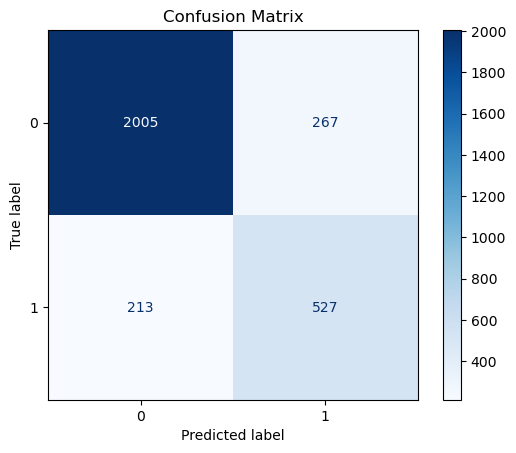

In [272]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [273]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9099


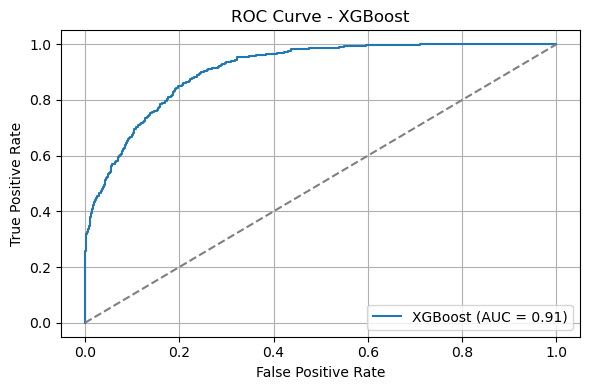

In [274]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning using RandomizedSearchCV

In [275]:
params = {'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]}

In [276]:
tuning = RandomizedSearchCV(estimator=xgb,param_distributions=params,n_iter=30,scoring='roc_auc',cv=3,verbose=1,random_state=42,n_jobs=-1)

In [277]:
tuning.fit(x_train_s, y_train_s)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\alito\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:05:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [278]:
print("Best Hyperparameters:", tuning.best_params_)

Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.6}


In [279]:
best_xgb = tuning.best_estimator_

In [280]:
y_pred1 = best_xgb.predict(x_test)
y_prob1 = best_xgb.predict_proba(x_test)[:, 1]

In [281]:
print("\nClassification Report:\n", classification_report(y_test, y_pred1))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      2272
           1       0.66      0.67      0.67       740

    accuracy                           0.83      3012
   macro avg       0.78      0.78      0.78      3012
weighted avg       0.84      0.83      0.84      3012



In [282]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[2017,  255],
       [ 243,  497]], dtype=int64)

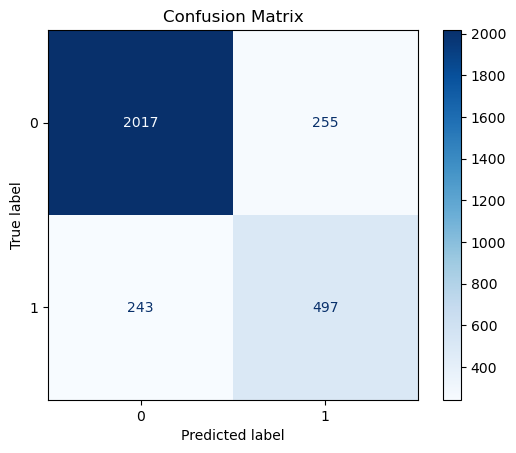

In [283]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [284]:
print("ROC AUC Score:", roc_auc_score(y_test, y_prob1))

ROC AUC Score: 0.9027574229158735


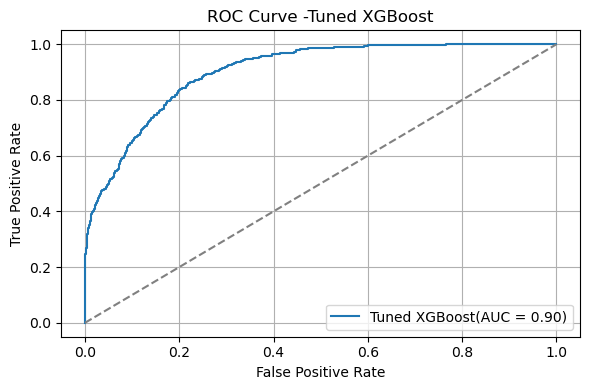

In [285]:
# Plot ROC Curve
fpr,tpr, _ = roc_curve(y_test,y_prob1)
plt.figure(figsize=(6, 4))
plt.plot(fpr,tpr,label=f"Tuned XGBoost(AUC = {roc_auc_score(y_test, y_prob1):.2f})")
plt.plot([0,1],[0,1],linestyle='--',color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve -Tuned XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [286]:
from xgboost import plot_importance

<Figure size 1500x1200 with 0 Axes>

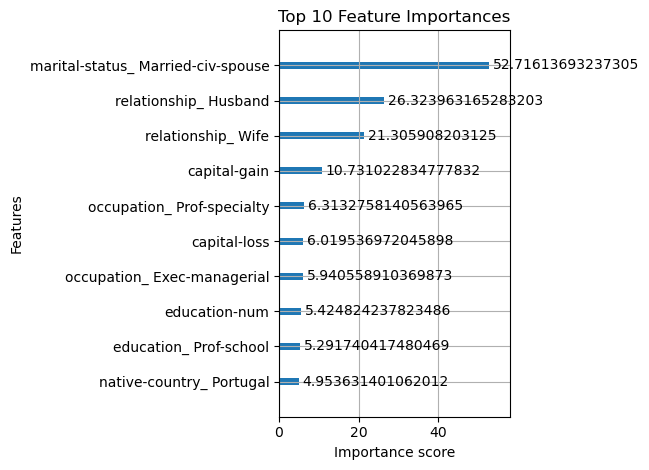

In [287]:
plt.figure(figsize=(15,12))
plot_importance(best_xgb,max_num_features=10,importance_type="gain")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

# Segment visualization 

### Income class distribution

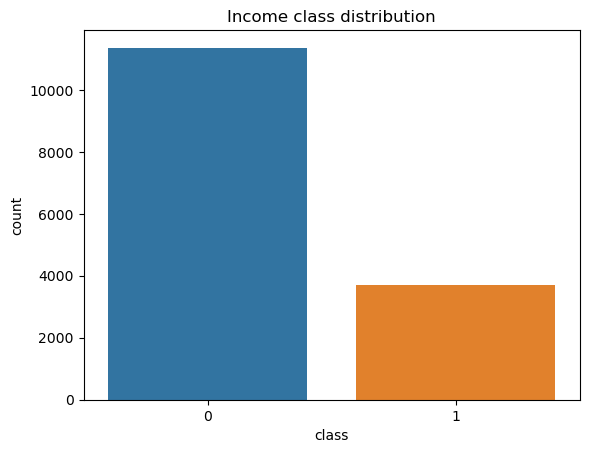

In [307]:
sns.countplot(data=df, x='class')
plt.title("Income class distribution")
plt.show()

### Income by Education

In [288]:
df['class'] = df['class'].astype(str)

In [309]:
# Calculate percentage
edu_class = df.groupby(["education","class"]).size().reset_index(name="count")
edu_class["percentage"] =edu_class["count"]/edu_class.groupby("education")["count"].transform("sum")*100

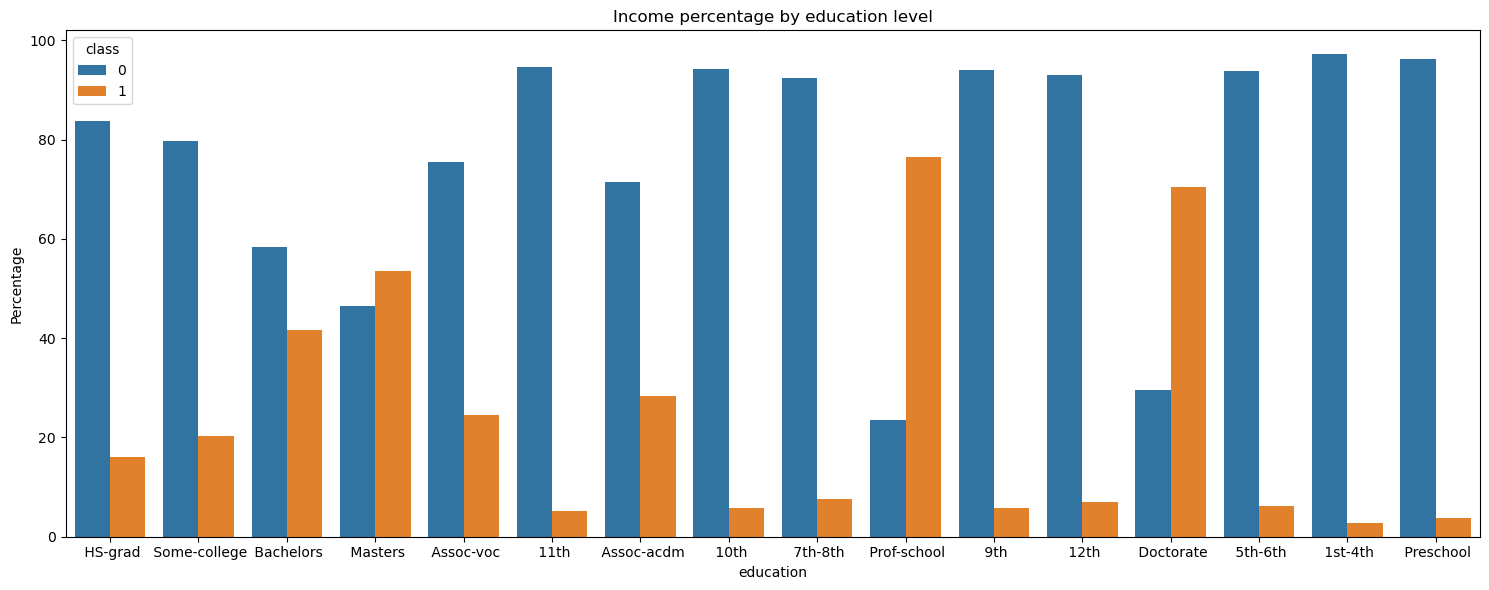

In [310]:
plt.figure(figsize=(15,6))
sns.barplot(data=edu_class,x="education",y="percentage",hue="class",order=df["education"].value_counts().index)
plt.title("Income percentage by education level")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

### Income by Age Group

In [311]:
df["age_group"]= pd.cut(df["age"],bins=[17, 25, 35, 45, 55, 65, 90], labels=["18-25","26-35","36-45","46-55","56-65","65+"])
age_group_class= df.groupby(["age_group","class"]).size().reset_index(name="count")

C:\Users\alito\AppData\Local\Temp\ipykernel_15728\2245575075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_class= df.groupby(["age_group","class"]).size().reset_index(name="count")


In [312]:
# calculate percentage
age_group_class["percentage"] = age_group_class["count"]/age_group_class.groupby("age_group")["count"].transform("sum")*100

C:\Users\alito\AppData\Local\Temp\ipykernel_15728\975227136.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_class["percentage"] = age_group_class["count"]/age_group_class.groupby("age_group")["count"].transform("sum")*100


C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


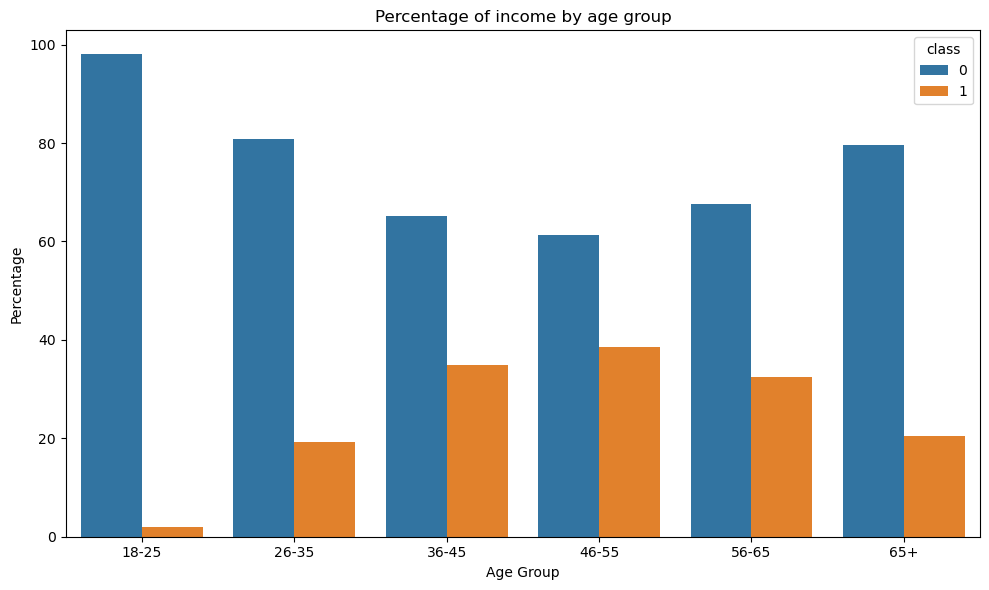

In [313]:
plt.figure(figsize=(10,6))
sns.barplot(data=age_group_class,x="age_group",y="percentage",hue="class")
plt.title("Percentage of income by age group")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

### Income by Workclass

In [314]:
workclass_class= df.groupby(["workclass","class"]).size().reset_index(name="count")

In [315]:
workclass_class["percentage"] = workclass_class["count"]/workclass_class.groupby("workclass")["count"].transform("sum")*100

In [316]:
workclass_order =df["workclass"].value_counts().index

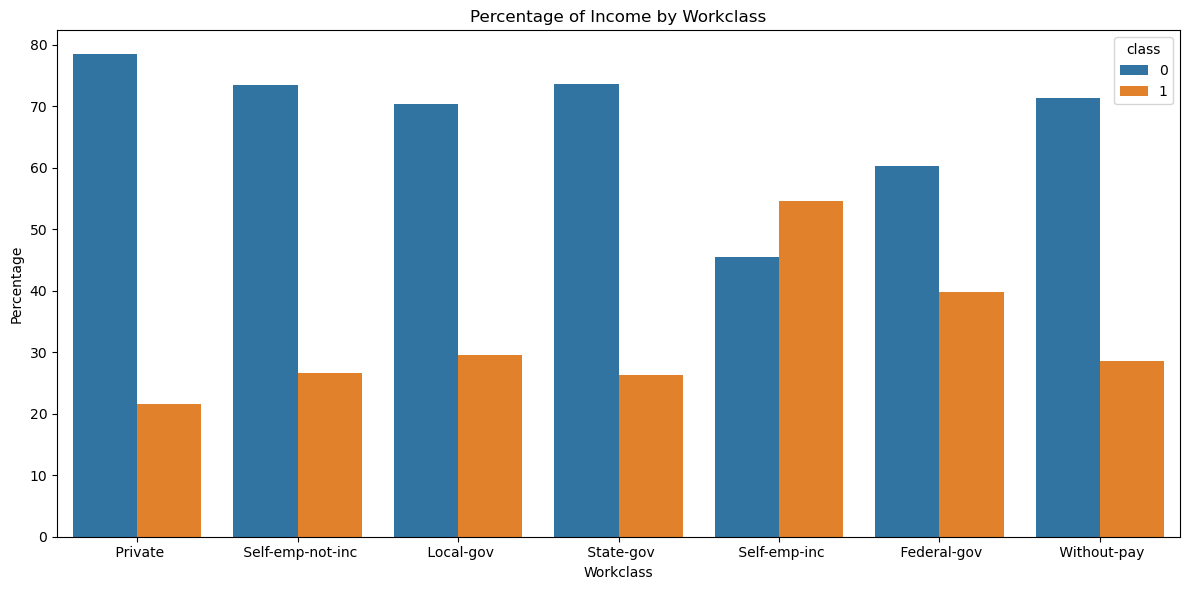

In [317]:
plt.figure(figsize=(12,6))
sns.barplot(data=workclass_class, x="workclass",y="percentage", hue="class", order=workclass_order)
plt.title("Percentage of Income by Workclass")
plt.ylabel("Percentage")
plt.xlabel("Workclass")
plt.tight_layout()
plt.show()

### Income by Occupation

In [318]:
occupation_class= df.groupby(["occupation","class"]).size().reset_index(name="count")

In [319]:
occupation_class["percentage"] = occupation_class["count"]/occupation_class.groupby("occupation")["count"].transform("sum")*100

In [320]:
occupation_order =df["occupation"].value_counts().index

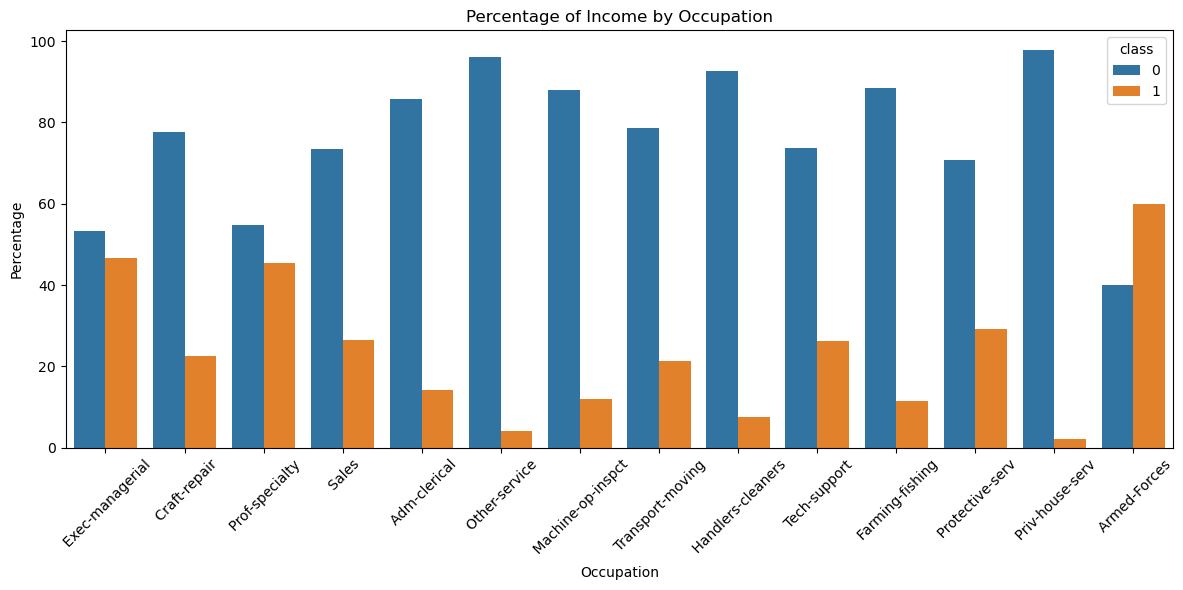

In [324]:
plt.figure(figsize=(12,6))
sns.barplot(data=occupation_class, x="occupation",y="percentage", hue="class", order=occupation_order)
plt.title("Percentage of Income by Occupation")
plt.ylabel("Percentage")
plt.xlabel("Occupation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Income by Gender

In [293]:
df["sex"] = df["sex"].astype(str)

In [325]:
gender_class= df.groupby(["sex","class"]).size().reset_index(name="count")

In [326]:
gender_class["percentage"] = gender_class["count"]/gender_class.groupby("sex")["count"].transform("sum")*100

In [327]:
gender_order =df["sex"].value_counts().index

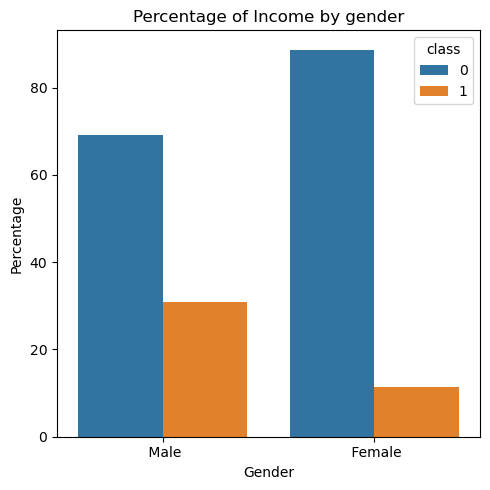

In [333]:
plt.figure(figsize=(5,5))
sns.barplot(data=gender_class, x="sex",y="percentage",hue="class",order=gender_order)
plt.title("Percentage of Income by gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()